In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn import datasets

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
df = pd.read_excel("/gdrive/My Drive/ΔΙΠΛΩΜΑΤΙΚΗ/DataExcels/Final_Database/2Final_Carlist.xlsx")

In [4]:
df

,Μάρκα,Μοντέλο,Τιμή,Κατηγορία,Χρονολογία,Χιλιόμετρα,Καύσιμο,Κυβικά,Ίπποι
0,Ford,Focus,9700,Λιμουζίνα/Sedan,2015,163000,Πετρέλαιο,1600,115
1,Ford,Fiesta,7950,Κόμπακτ/Hatchback,2013,83000,Βενζίνη,1242,82
2,Ford,Ka,6300,Κόμπακτ/Hatchback,2013,61840,Βενζίνη,1242,70
3,Ford,Focus,11450,Κόμπακτ/Hatchback,2015,69700,Βενζίνη,998,125
4,Subaru,Forester,4500,4χ4/Τζιπ/Suv,2001,124000,Βενζίνη,1994,150
...,...,...,...,...,...,...,...,...,...
2932,Hyundai,Atos,1900,Κόμπακτ/Hatchback,2002,325000,Βενζίνη,998,58
2933,Hyundai,Atos,1790,Λιμουζίνα/Sedan,2002,189500,Βενζίνη,1000,70
2934,Hyundai,Atos,3500,Κόμπακτ/Hatchback,2006,131000,Βενζίνη,1100,70
2935,Hyundai,Atos,2300,Κόμπι/Kάραβαν,2000,170000,Βενζίνη,1000,56


In [5]:
df.keys

<bound method NDFrame.keys of         Μάρκα   Μοντέλο   Τιμή  ...    Καύσιμο  Κυβικά  Ίπποι
0        Ford     Focus   9700  ...  Πετρέλαιο    1600    115
1        Ford    Fiesta   7950  ...    Βενζίνη    1242     82
2        Ford        Ka   6300  ...    Βενζίνη    1242     70
3        Ford     Focus  11450  ...    Βενζίνη     998    125
4      Subaru  Forester   4500  ...    Βενζίνη    1994    150
...       ...       ...    ...  ...        ...     ...    ...
2932  Hyundai      Atos   1900  ...    Βενζίνη     998     58
2933  Hyundai      Atos   1790  ...    Βενζίνη    1000     70
2934  Hyundai      Atos   3500  ...    Βενζίνη    1100     70
2935  Hyundai      Atos   2300  ...    Βενζίνη    1000     56
2936   Suzuki     Ignis   3200  ...  Πετρέλαιο    1300     80

[2937 rows x 9 columns]>

In [6]:
df.isnull().sum()

Μάρκα         0
Μοντέλο       0
Τιμή          0
Κατηγορία     0
Χρονολογία    0
Χιλιόμετρα    0
Καύσιμο       0
Κυβικά        0
Ίπποι         0
dtype: int64

In [7]:
df['Τιμή'].mean()

7717.596527068437

In [8]:
df['Τιμή'].median()

6999.0

In [9]:
print(df.Τιμή.max())
print(df.Τιμή.min())

115000
1000


In [10]:
df.sort_values('Τιμή', ascending=False).head(10)

,Μάρκα,Μοντέλο,Τιμή,Κατηγορία,Χρονολογία,Χιλιόμετρα,Καύσιμο,Κυβικά,Ίπποι
2637,Porsche,Cayman,115000,Κουπέ-Σπόρ,2020,4950,Βενζίνη,4000,400
105,Jeep,Wrangler,88450,4χ4/Τζιπ/Suv,2010,33164,Αέριο(lpg) - βενζίνη,3800,245
2818,Bmw,X5,65800,4χ4/Τζιπ/Suv,2017,54000,Πετρέλαιο,1998,241
2627,Bmw,M3,60000,Κουπέ-Σπόρ,1988,180000,Βενζίνη,2300,195
2633,Porsche,Cayman,53000,Κουπέ-Σπόρ,2011,72800,Βενζίνη,3400,355
2659,Bmw,M3,49900,Κάμπριο/Roadster,2008,12500,Βενζίνη,4000,550
2630,Bmw,M3,47000,Κουπέ-Σπόρ,2008,33500,Βενζίνη,3999,420
2665,Bmw,M3,47000,Κουπέ-Σπόρ,2008,42000,Βενζίνη,3999,420
2648,Bmw,M3,46900,Κουπέ-Σπόρ,2008,78000,Βενζίνη,4000,450
2632,Porsche,Cayman,42900,Κουπέ-Σπόρ,2009,60500,Βενζίνη,2700,385


In [11]:
df.sort_values('Τιμή', ascending=True).head(10)

,Μάρκα,Μοντέλο,Τιμή,Κατηγορία,Χρονολογία,Χιλιόμετρα,Καύσιμο,Κυβικά,Ίπποι
743,Honda,Civic,1000,Λιμουζίνα/Sedan,1990,344000,Βενζίνη,1199,75
846,Honda,Civic,1000,Λιμουζίνα/Sedan,1992,318500,Βενζίνη,1532,90
2550,Volkswagen,Golf,1000,Κόμπακτ/Hatchback,1994,449000,Βενζίνη,1399,75
2912,Opel,Kadett,1000,Κόμπι/Kάραβαν,1971,200000,Βενζίνη,1200,60
1666,Seat,Ibiza,1000,Κουπέ-Σπόρ,1999,200000,Αέριο(lpg) - βενζίνη,1400,101
2927,Hyundai,Atos,1000,Επαγγελματικό Eπιβατικό,2001,200000,Βενζίνη,999,80
1179,Renault,Megane,1000,Λιμουζίνα/Sedan,1997,214000,Αέριο(lpg) - βενζίνη,1400,75
2795,Opel,Kadett,1000,Κόμπακτ/Hatchback,1986,150000,Βενζίνη,2000,160
1502,Seat,Leon,1000,Αλλο,2002,200000,Βενζίνη,1600,108
1104,Opel,Astra,1100,Κόμπακτ/Hatchback,1997,275000,Βενζίνη,1400,90


In [12]:
df['Χρονολογία'].mean()

2009.538304392237

In [13]:
df['Χρονολογία'].median()

2011.0

In [14]:
print(df.Χρονολογία.max())
print(df.Χρονολογία.min())

2021
1966


In [15]:
df['Χιλιόμετρα'].mean()

136958.7698331631

In [16]:
df['Χιλιόμετρα'].median()

129000.0

In [17]:
print(df.Χιλιόμετρα.max())
print(df.Χιλιόμετρα.min())

498560
1000


In [18]:
df['Κυβικά'].mean()

1451.8103506979912

In [19]:
df['Κυβικά'].median()

1400.0

In [20]:
print(df.Κυβικά.max())
print(df.Κυβικά.min())

4000
700


In [21]:
df['Ίπποι'].mean()

110.3190330268982

In [22]:
df['Ίπποι'].median()

95.0

In [23]:
print(df.Ίπποι.max())
print(df.Ίπποι.min())

550
40


In [24]:
df2 =df[['Μάρκα','Μοντέλο','Κατηγορία','Χρονολογία','Χιλιόμετρα','Καύσιμο','Κυβικά','Ίπποι','Τιμή']]

In [25]:
pd.set_option("display.max_rows",3000)

In [26]:
df2['Μάρκα'].value_counts()

Ford          447
Toyota        325
Seat          224
Skoda         198
Honda         197
Opel          190
Kia           158
Suzuki        149
Hyundai       144
Mazda         143
Volkswagen    127
Renault        98
Peugeot        94
Fiat           85
Bmw            77
Audi           73
Nissan         70
Citroen        56
Subaru         35
Jeep           19
Porsche        16
Smart          12
Name: Μάρκα, dtype: int64

In [27]:
df2['Μοντέλο'].value_counts()

Fiesta      252
Yaris       186
Focus       144
Atos        138
Civic       120
Octavia     105
Corsa       104
Ibiza       101
Leon         90
Picanto      80
Ignis        69
Astra        65
Fabia        63
Swift        58
Golf         57
Clio         56
Polo         48
Jazz         47
Corolla      43
C3           42
Aygo         42
208          42
Auris        38
Panda        36
M3           35
Sportage     35
RX-8         34
Qashqai      33
Ceed         32
MX-5         32
CR-V         30
500          29
A3           28
3            27
2            26
Mondeo       25
6            24
Micra        22
Megane       22
Kadett       21
Punto        20
Q5           18
Cordoba      18
Forester     18
Impreza      17
X3           17
308          16
Cayman       16
Ka           16
Avensis      16
Mii          15
A4           15
Captur       15
X5           14
C1           14
Jimny        13
Cherokee     13
Citigo       13
Tiguan       12
206          12
A1           12
2008         11
Sorento 

In [28]:
df2['Κατηγορία'].value_counts()

Κόμπακτ/Hatchback          1365
Λιμουζίνα/Sedan             447
Κουπέ-Σπόρ                  349
4χ4/Τζιπ/Suv                318
Αλλο                        193
Κόμπι/Kάραβαν               129
Κάμπριο/Roadster             66
Επαγγελματικό Eπιβατικό      43
Van/Mini Bus                 10
Αγροτικό/Pickup               9
Αγωνιστικό                    7
Κουπέ-Σπόρ                    1
Name: Κατηγορία, dtype: int64

In [29]:
df2['Χρονολογία'].value_counts()

2013    264
2016    231
2014    221
2015    211
2007    188
2012    180
2005    163
2006    159
2017    150
2008    145
2009    139
2004    131
2011    109
2010    101
2002     96
2003     89
2018     75
2001     65
2000     49
1999     36
1998     30
2019     27
1997     17
2020      7
1995      7
1993      6
1992      5
1991      5
1990      4
1978      3
1976      2
1971      2
1982      2
1996      2
1994      2
1970      2
1989      2
1977      2
1972      1
2021      1
1986      1
1988      1
1967      1
1979      1
1987      1
1966      1
Name: Χρονολογία, dtype: int64

In [30]:
df2['Χιλιόμετρα'].value_counts()

200000    42
150000    42
120000    33
130000    33
170000    29
100000    29
165000    28
180000    27
160000    25
110000    23
125000    21
210000    21
220000    21
145000    20
140000    19
98000     19
118000    18
90000     18
115000    18
128000    18
114000    17
175000    17
155000    17
105000    16
135000    15
190000    15
119000    15
106000    15
99000     15
75000     14
122000    14
182000    14
108000    14
85000     14
185000    14
158000    13
250000    13
80000     13
112000    13
103000    13
81000     12
113000    12
230000    12
72000     12
116000    12
121000    12
300000    12
104000    12
133000    12
149000    12
152000    12
142000    11
198000    11
132000    11
138000    11
123000    11
195000    11
146000    11
143000    11
134000    11
89000     11
136000    10
154000    10
159000    10
102000    10
84000     10
172000    10
96000     10
107000    10
270000     9
97000      9
70000      9
91000      9
124000     9
240000     9
117000     9
71000      9

In [31]:
df2['Καύσιμο'].value_counts()

Βενζίνη                        1858
Πετρέλαιο                       872
Αέριο(lpg) - βενζίνη            192
Φυσικό αέριο(cng) - βενζίνη      11
Υβριδικό βενζίνη                  4
Name: Καύσιμο, dtype: int64

In [32]:
df2['Κυβικά'].value_counts()

1400    384
1600    336
1000    286
1300    232
1200    223
1500    160
1800    125
2000    118
1100     62
998      61
999      60
1598     54
1242     51
1560     46
1250     46
1248     40
1499     33
1461     28
1390     27
1998     23
1364     21
1199     17
1086     16
2500     16
1198     15
3000     14
1339     13
1240     13
1798     12
2400     12
1328     12
1597     12
1329     11
1396     11
1388     11
1398     10
2700      9
1984      9
1360      9
4000      8
1229      8
1781      8
1995      8
1197      8
1460      8
1399      7
1330      7
900       6
1999      6
1700      6
3200      6
1975      5
1349      5
1422      5
1596      5
2457      5
1900      5
1498      5
1308      5
1994      5
3999      4
1590      4
1595      4
2200      4
3400      4
1490      4
1350      4
1246      4
1796      3
1570      3
1299      3
1686      3
1997      3
1380      3
898       3
2300      3
3243      3
2800      3
1149      3
2979      3
1493      2
2429      2
1336      2
1334

In [33]:
df2['Ίπποι'].value_counts()

90     323
75     299
95     180
110    142
70     141
85     128
100    118
80     113
115    103
150     97
105     94
120     80
101     76
125     74
65      62
140     57
60      52
160     39
82      38
69      37
68      32
116     29
192     20
130     20
86      19
122     19
231     18
200     17
58      16
136     15
170     15
55      15
145     14
67      14
211     14
180     12
225     12
230     11
78      10
99      10
109     10
245      9
92       9
96       9
190      8
420      8
97       8
126      8
87       8
83       7
102      7
98       7
280      7
147      7
300      7
343      6
260      6
240      6
210      6
72       6
400      5
141      5
270      5
94       5
350      4
71       4
163      4
321      4
201      4
89       4
182      4
193      4
143      4
131      4
111      4
93       4
84       4
158      3
132      3
114      3
320      3
112      3
250      3
88       3
54       3
56       3
177      3
185      3
64       3
340      2
62       2

In [34]:
df2['Τιμή'].value_counts()

6500      64
7500      59
3500      58
5500      51
8000      49
4500      47
8500      46
2500      43
6000      36
7000      35
4000      34
9500      32
2000      31
6800      31
7800      29
5000      29
9000      29
3000      28
5900      27
8900      27
7900      26
10000     26
5200      25
6700      25
7700      24
6900      24
10500     22
8800      22
7300      21
11000     21
2900      21
3200      21
3900      20
6999      20
4200      20
2800      19
5700      19
6300      19
5800      19
2200      19
2700      19
11500     19
3800      19
7200      19
8300      18
1800      18
7990      18
7999      17
4700      17
12000     17
12500     17
10900     17
4800      16
8200      16
9990      16
1500      15
3300      15
6990      15
9800      14
2300      14
11900     14
10800     14
8990      14
3700      14
3600      13
8700      13
7600      13
6499      13
9200      13
4900      13
7400      13
6200      13
2600      12
9900      12
12900     12
6400      12
8600      11

In [35]:
df.dtypes

Μάρκα         object
Μοντέλο       object
Τιμή           int64
Κατηγορία     object
Χρονολογία     int64
Χιλιόμετρα     int64
Καύσιμο       object
Κυβικά         int64
Ίπποι          int64
dtype: object

In [36]:
df2['Μάρκα'] = df2['Μάρκα'].astype('category').cat.codes
df2['Μοντέλο'] = df2['Μοντέλο'].astype('category').cat.codes
df2['Κατηγορία'] = df2['Κατηγορία'].astype('category').cat.codes
df2['Καύσιμο'] = df2['Καύσιμο'].astype('category').cat.codes

In [37]:
df2.dtypes

Μάρκα          int8
Μοντέλο        int8
Κατηγορία      int8
Χρονολογία    int64
Χιλιόμετρα    int64
Καύσιμο        int8
Κυβικά        int64
Ίπποι         int64
Τιμή          int64
dtype: object

In [38]:
df2['Μάρκα'].value_counts()

4     447
20    325
15    224
16    198
5     197
11    190
8     158
19    149
6     144
9     143
21    127
14     98
12     94
3      85
1      77
0      73
10     70
2      56
18     35
7      19
13     16
17     12
Name: Μάρκα, dtype: int64

4=Ford /
20=Toyota /
15=Seat /
16=Skoda /
5=Honda /
11=Opel /
8=Kia /
19=Suzuki /
6=Hyundai /
9=Mazda /
21=Volkswagen /
14=Renault /
12=Peugeot /
3=Fiat /
1=BMW /
0=Audi /
10=Nissan /
2=Citroen /
18=Subaru /
7=Jeep / 
13=Porsche /
17=Smart /

In [39]:
df2['Μοντέλο'].value_counts()

32    252
77    186
33    144
14    138
26    120
56    105
30    104
39    101
48     90
59     80
40     69
13     65
31     63
68     58
38     57
27     56
60     48
42     47
29     43
3      42
17     42
19     42
15     38
57     36
66     35
49     35
64     34
63     33
23     32
50     32
20     30
8      29
11     28
4      27
0      26
54     25
9      24
52     22
51     22
46     21
61     20
62     18
28     18
36     18
75     17
41     17
7      16
22     16
45     16
16     16
53     15
21     15
12     15
76     14
18     14
43     13
25     13
24     13
69     12
2      12
10     12
65     11
1      11
58     10
47     10
72      9
44      9
67      9
6       8
78      8
74      8
35      8
55      6
73      6
5       5
71      5
34      4
37      4
79      3
70      2
Name: Μοντέλο, dtype: int64

32=Fiesta / 77=Yaris/ 33=Focus / 14=Atos / 26=Civic / 56=Octavia / 30=Corsa / 39=Ibiza / 48=Leon / 59=Picanto / 40=Ignis / 13=Astra / 31=Fabia / 68=Swift / 38=Golf / 27=Clio/ 60=Polo / 42=Jazz / 29=Corolla / 3=Aygo /17=208 / 19=C3 / 15=Auris / 49=M3 / 57=Panda / 66=Sportage / 64=RX-8 / 63=Qashqai / 23=MX-5 /50=Ceed / 20=CR-V / 8=500 / 11=A3 / 4=3 / 0=2 / 54=Mondeo / 9=6 / 52=Megane / 51=Micra / 46=Kadet / 61=Punto / 62=Forrester / 28=Cordoba / 36=Q5 / 75=Impreza / 41=X3 / 7=Cayman / 22=Ka / 45=308 / 16=Avensis / 53=Mii / 21=Captur / 12=A4 / 76=C1 / 18=X5 / 43=206 / 2=Citigo / 25=Jimny / 24=Cherokee / 69=A1 / 10=Tiguan / 65=Sorento / 1=2008 / 58=Kuga / 47=Passat / 72=Juke / 44=Vitara / 67=Superb / 6=Yeti / 78=X1 / 74=ForTwo / 35=307 / 55=Wrangler / 73=Navara / 5=3008 / 71=Twingo / 34=ForFour / 37=Getz / 79=Z4 / 70=Tucson

In [40]:
df2['Κατηγορία'].value_counts()

9     1365
11     447
7      349
0      318
4      193
10     129
6       66
5       43
1       10
2        9
3        7
8        1
Name: Κατηγορία, dtype: int64

9=Κόμπακτ/Hatchback / 11=Λιμουζίνα/Sedan / 7=Κουπέ-Σπόρ / 0=4χ4/Τζιπ/Suv / 4=Αλλο / 10=Κόμπι/Kάραβαν / 6=Κάμπριο/Roadster / 5=Επαγγελματικό Επιβατικό / 1=Van/Mini Bus / 2=Αγροτικό/Pickup / 3=Αγωνιστικό  / 8=Κουπέ-Σπόρ

In [41]:
df2['Καύσιμο'].value_counts()

1    1858
2     872
0     192
4      11
3       4
Name: Καύσιμο, dtype: int64

1=Βενζίνη / 2=Πετρέλαιο / 0=Αέριο(lpg) - βενζίνη / 4=Φυσικό αέριο(cng) - βενζίνη / 3 =Υβριδικό βενζίνη

In [42]:
df2.corr()

,Μάρκα,Μοντέλο,Κατηγορία,Χρονολογία,Χιλιόμετρα,Καύσιμο,Κυβικά,Ίπποι,Τιμή
Μάρκα,1.000000,0.302841,0.065968,0.037765,0.014953,0.051722,-0.162070,-0.117348,-0.073975
Μοντέλο,0.302841,1.000000,-0.175914,0.024718,-0.025748,0.009015,0.102367,0.131176,0.090053
Κατηγορία,0.065968,-0.175914,1.000000,0.033856,0.000525,-0.038601,-0.302994,-0.174455,-0.194663
Χρονολογία,0.037765,0.024718,0.033856,1.000000,-0.441197,0.392509,-0.200065,-0.139202,0.411809
Χιλιόμετρα,0.014953,-0.025748,0.000525,-0.441197,1.000000,-0.121300,0.108303,-0.003466,-0.390007
Καύσιμο,0.051722,0.009015,-0.038601,0.392509,-0.121300,1.000000,0.019267,-0.114557,0.222713
Κυβικά,-0.162070,0.102367,-0.302994,-0.200065,0.108303,0.019267,1.000000,0.748345,0.445357
Ίπποι,-0.117348,0.131176,-0.174455,-0.139202,-0.003466,-0.114557,0.748345,1.000000,0.475853
Τιμή,-0.073975,0.090053,-0.194663,0.411809,-0.390007,0.222713,0.445357,0.475853,1.000000


In [43]:
# προετοιμασία χαρακτηριστικών και target
X = df2.drop(columns='Τιμή')
y = df2.Τιμή
y = y.values.reshape(-1, 1)

#Linear Regression

In [44]:
# 1. Split data σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Δημιουργία του  Regressor 
lin_regr = LinearRegression()
# 2. Fitting του Regression
lin_regr.fit(X_train, y_train)
# 3. Test τον regressor με τα test data και με τα  training για σύγκριση
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# 4. υπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Έχουμε τώρα τις προβλέψεις μας και τη συνολική απόδοση του μοντέλου μας
print('Predictions: ', y_pred_test)
print('Test performance: ', r2_test)
print('Train performance: ', r2_train)

Predictions:  [[ 1.05034839e+04]
 [ 9.76952800e+03]
 [ 2.84718562e+03]
 [ 8.49098627e+03]
 [ 1.45870339e+03]
 [ 1.52934747e+04]
 [ 2.48715154e+03]
 [ 9.73626921e+03]
 [ 8.15012743e+03]
 [ 3.24398392e+03]
 [-4.96986322e+02]
 [ 1.05874441e+04]
 [ 9.93707978e+03]
 [ 1.13806949e+04]
 [ 1.09790526e+04]
 [ 6.28740327e+03]
 [ 1.12587513e+04]
 [ 9.86552869e+03]
 [ 9.17343845e+03]
 [-6.91276948e+02]
 [ 5.01479410e+03]
 [ 4.43858825e+03]
 [ 3.88941950e+03]
 [ 1.72148613e+04]
 [ 5.53345635e+03]
 [ 8.97508177e+03]
 [ 9.70450585e+03]
 [ 3.94355729e+03]
 [ 6.90477297e+03]
 [ 1.39989018e+03]
 [ 6.41062576e+03]
 [ 6.41062802e+03]
 [ 9.34853300e+03]
 [ 6.05089654e+03]
 [ 1.33042180e+04]
 [ 7.00508476e+03]
 [ 1.80950765e+04]
 [ 1.62612351e+04]
 [ 1.18112832e+04]
 [ 1.21764924e+04]
 [ 6.07263357e+03]
 [ 3.16472218e+03]
 [ 3.71985620e+03]
 [ 4.36719748e+03]
 [ 7.84419189e+03]
 [ 6.33929988e+03]
 [ 1.16361084e+04]
 [ 8.54683010e+03]
 [ 7.40208500e+03]
 [ 7.33522367e+03]
 [ 6.76327935e+03]
 [ 5.93855768e+03

In [45]:
# Ποια είναι τα coefficients?
coef = lin_regr.coef_
print(coef)

[[ 8.55619082e+00 -3.51153134e+00 -1.01873880e+02  3.47197358e+02
  -2.18528084e-02  6.13378371e+02  4.62995899e+00  3.09897357e+01]]


In [46]:
# Tα coefficients επιστρέφονται ως numpy array. 
#Θα μετατρέψουμε αυτό το array σε λίστα για να οπτικοποιήσουμε τα coefficients. 
print(type(coef))
coef = coef.tolist()[0] # μετατροπή σε .tolist()
print(type(coef))
print(coef)

<class 'numpy.ndarray'>
<class 'list'>
[8.556190821166506, -3.5115313367587015, -101.87387988960484, 347.1973583422847, -0.021852808368458376, 613.3783706937884, 4.629958991138028, 30.989735744469975]


In [47]:
# Πάρτε τις ετικέτες για τα χαρακτηριστικά ως λίστα. 
# Επιστρέφει μια λίστα των χαρακτηριστικών εκτός από το target (quality)
labels = df2.columns.values[:-1].tolist()
print(labels)

['Μάρκα', 'Μοντέλο', 'Κατηγορία', 'Χρονολογία', 'Χιλιόμετρα', 'Καύσιμο', 'Κυβικά', 'Ίπποι']


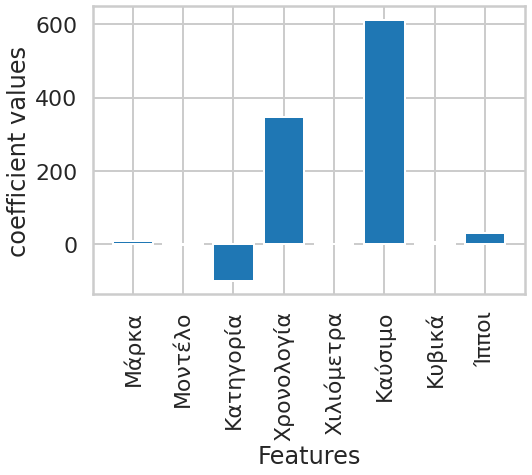

In [48]:
# Plot τα coefficients για κάθε feature
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels, coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

In [49]:
X.head()

,Μάρκα,Μοντέλο,Κατηγορία,Χρονολογία,Χιλιόμετρα,Καύσιμο,Κυβικά,Ίπποι
0,4,33,11,2015,163000,2,1600,115
1,4,32,9,2013,83000,1,1242,82
2,4,45,9,2013,61840,1,1242,70
3,4,33,9,2015,69700,1,998,125
4,18,36,0,2001,124000,1,1994,150


In [50]:
# Είσοδος του standardizer package
from sklearn.preprocessing import StandardScaler
# Διαχωρισμός σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#############################################################################
# Εδώ είναι το StandardScaler application
# Standardize data using StandardScaler - 
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = scaler_targets.transform(y_train)
X_test = scaler_features.transform(X_test)
y_test = scaler_targets.transform(y_test)
#############################################################################
# Από εδώ και στο εξής κάνουμε τα συνηθισμένα βήματα 
# Δημιουργία του Regressor 
lin_regr = LinearRegression()
# Fitting του Regression
lin_regr.fit(X_train, y_train)
# Test regressor 
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# υπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Παίρνουμε τα coefficients 
coef = lin_regr.coef_.tolist()[0]

In [51]:
print(r2_test)
print(r2_train)

0.6391454758689259
0.5362376045587995


In [52]:
print(coef)

[0.009409392980431973, -0.012302398806103898, -0.05661492100247585, 0.3715039004210338, -0.23984674544752102, 0.06218278537492995, 0.32055863622837893, 0.28339754296300873]


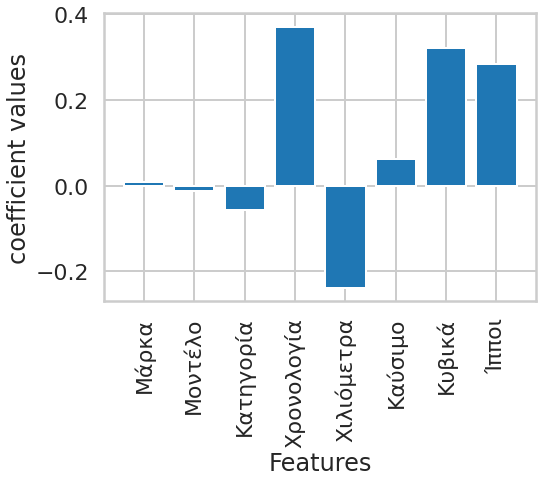

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

**Linear Regression Results**
Test = 0.6391454758689259
Train = 0.5362376045587995
Μέτρια Πρόβλεψη

Η χρονολογία είναι το πιο σημαντικό χαρακτηριστικό για την πρόβλεψη (37.1%), ακολουθούν κυβικά (32%), Ίπποι (28%),  Χιλιόμετρα (-23%) 
Πολύ χαμηλή η σημασία της μάρκας (0.9%) και του μοντέλου (-1%)

In [54]:
coef_retransformed = scaler_features.inverse_transform(coef)
print(coef_retransformed)

[1.09090324e+01 3.82216856e+01 7.46480804e+00 2.01195947e+03
 1.20797127e+05 1.28176441e+00 1.57972443e+03 1.25227196e+02]


# **Decision Trees**

In [55]:
# Προετοιμασία features και target - προετοιμασμένα για επαναφόρτωση των δεδομένων / διερεύνηση του standarization
X = df2.drop(columns='Τιμή')
y = df2.Τιμή.values.reshape(-1, 1)
# Split σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
# Transform the data
X_train = scaler_features.transform(X_train)
X_test = scaler_features.transform(X_test)
# Δημιουργία του Regressor, με max_depth=6
dec_tree = DecisionTreeRegressor(max_depth=6)
# Fitting το Decision tree
dec_tree.fit(X_train, y_train)
# Test τον Decision tree με τα test data (και τα training data για να τα συγκρίνουμε)
y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)
# Yπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [56]:
print(r2_test)
print(r2_train)

0.7000513487951636
0.8810169494342104


In [57]:
# Η σημασία των χαρακτηριστικών υπολογίζεται αυτόματα κατά την εκπαίδευση του DT και αποθηκεύεται στη μεταβλητή feature_importance_
print(dec_tree.feature_importances_)

[0.         0.01501595 0.04378571 0.33909588 0.04073666 0.
 0.36737323 0.19399255]


In [58]:
# Μετατροπή features importance σε list
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

[0.0, 0.015015951666043394, 0.04378571463279503, 0.3390958843833007, 0.04073666498181331, 0.0, 0.36737323318068876, 0.19399255115535885]


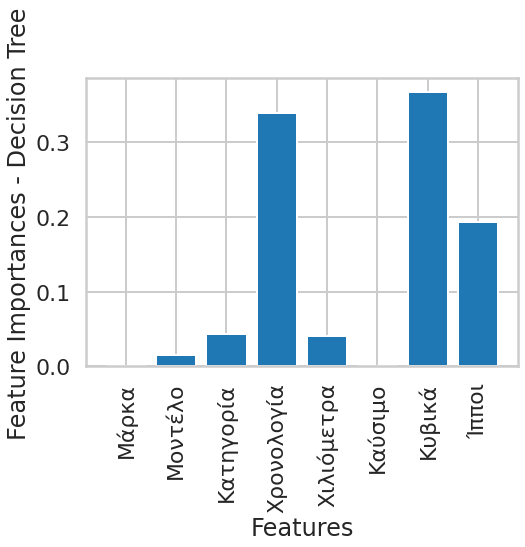

In [59]:
# Δημιουργήστε την ίδια γραφική παράσταση όπως και για στο γραμμικό μοντέλο
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

**Decision Tree:**
Test: 0.7000513487951636
Train: 0.8810169494342104

Σημαντική Βελτίωση της ακρίβειας του αποτελέσματος σε σύγκριση με linear regression.

Τα σημαντικότερα στοιχεία για την πρόβλεψη της τιμής βλέπουμε και πάλι ότι είναι η χρονολογία (35.5%), Κυβικά (32.5%), Ίπποι (19.3%), Χιλιόμετρα (6.4%).
Εντυπωσιάζει ότι η μάρκα δεν παίζει κανέναν απολύτως ρόλο (0%). Το μοντέλο επηρρεάζει κατά ένα 2%


# **RANDOM FOREST**

In [67]:
# Split σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = np.ravel(scaler_targets.transform(y_train))
X_test = scaler_features.transform(X_test)
y_test = np.ravel(scaler_targets.transform(y_test))
# Δημιουργία του Regressor, με λίγα n_estimators για να  μην πάρει πολύ χρόνο
rf_regr = RandomForestRegressor(n_estimators=50)
# Fitting το RF
rf_regr.fit(X_train, y_train)
# Test το RF με test data (και τα training data για να τα συγκρίνουμε)
y_pred_test = rf_regr.predict(X_test)
y_pred_train = rf_regr.predict(X_train)
# Yπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [68]:
print(r2_test)
print(r2_train)

0.8505552131477491
0.9607121189628111


In [70]:
# Η σημασία των χαρακτηριστικών υπολογίζεται αυτόματα κατά την εκπαίδευση του DT και αποθηκεύεται στη μεταβλητή feature_importance_
rf_feat_imp = rf_regr.feature_importances_.tolist()
print(rf_feat_imp)

[0.027185619111350347, 0.03255631506238903, 0.02743184827037642, 0.2871073429156539, 0.1029605579319886, 0.011595882849157076, 0.3174133989992711, 0.19374903485981357]


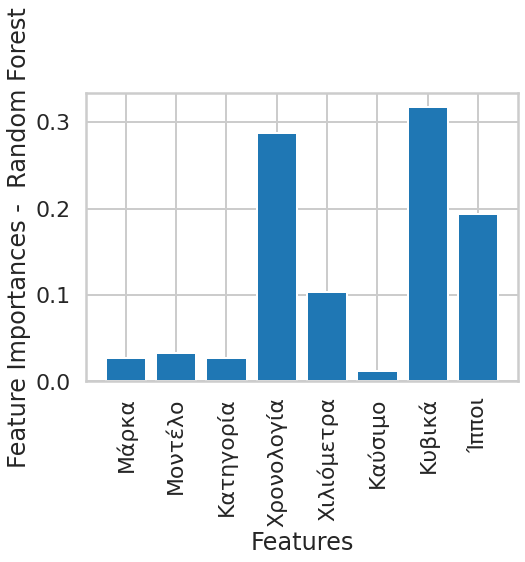

In [71]:
# Το ίδιο γράφημα με πριν
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,rf_feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances -  Random Forest')
plt.show()

Random Forest
Test = 0.8510478620352048
Train = 0.9619815675378547

Εξαιρετική κι η ακριβέστερη η προβλεπτική ικανότητα του Randmo Forest.

Εδώ βλέπουμε ότι ο κυβισμός (0.293) και η χρονολογία (0.289) είναι εξίσου σημαντικά χαρακτηριστικά για την πρόβλεψη, με τον κυβισμό μάλιστα να ξεπερνά και κατά λίγο τη χρονολογία. Ακολουθούν η ιπποδύναμη (0.214) και τα χιλιόμετρα (0.101).

Αυτήν τη φορά επίσης βλέπουμε ότι έχει μια σημασία κια η μάρκα (0.029). Το λιγότερο σημαντικό χαρακτηριστικό είναι το καύσιμο. Ωστόσο εδώ πρέπει να πούμε ότι σχεδόν όλα τα αυτοκίνητα ήταν είτε βενζινοκίνητα είτε πετρελαιοκίνητα, με ελάχιστα να κινούναι με υγραέριο, φυσικό αέριο ή να είναι υβριδικά. Δεν είχαμε κανένα ηλεκτρικό αυτοκίνητο. Εφόσον η βάση δεδομένων ήταν πιο πλούσια σε τύπους καυσίμων, τότε ίσως τα καύσιμα να έπαιζαν μεγαλύτερο ρόλο στην προβλεπτική (δεδομένου ότι γενικά τα ηλεκτρικά και τα υβριδικά αυτοκίνητα είναι πολύ πιο ακριβά από τα συμβατικά. Ωστόσο, δεν υπάρχουν τόσα πολλά στην ελληνική αγορά των μεταχειρισμένων).

# **Πρόβλεψη**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
linreg = LinearRegression()

In [75]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
scores = cross_val_score(linreg, X_train, y_train, cv=5)
print(np.mean(scores))

0.5417733449965693


In [77]:
scores_test = cross_val_score(linreg, X_test, y_test, cv=5)
print(np.mean(scores_test))

0.6126866443631622


In [78]:
linreg.score(X_train, y_train)

0.5360668327435998

In [79]:
linreg.score(X_test, y_test)

0.6434116549431261

In [80]:
# 1. Split data σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Δημιουργία του  Regressor 
lin_regr = LinearRegression()
# 2. Fitting του Regression
lin_regr.fit(X_train, y_train)
# 3. Test τον regressor με τα test data και με τα  training για σύγκριση
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# 4. υπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Έχουμε τώρα τις προβλέψεις μας και τη συνολική απόδοση του μοντέλου μας
print('Predictions: ', y_pred_test)
print('Test performance: ', r2_test)
print('Train performance: ', r2_train)

Predictions:  [[ 1.05034839e+04]
 [ 9.76952800e+03]
 [ 2.84718562e+03]
 [ 8.49098627e+03]
 [ 1.45870339e+03]
 [ 1.52934747e+04]
 [ 2.48715154e+03]
 [ 9.73626921e+03]
 [ 8.15012743e+03]
 [ 3.24398392e+03]
 [-4.96986322e+02]
 [ 1.05874441e+04]
 [ 9.93707978e+03]
 [ 1.13806949e+04]
 [ 1.09790526e+04]
 [ 6.28740327e+03]
 [ 1.12587513e+04]
 [ 9.86552869e+03]
 [ 9.17343845e+03]
 [-6.91276948e+02]
 [ 5.01479410e+03]
 [ 4.43858825e+03]
 [ 3.88941950e+03]
 [ 1.72148613e+04]
 [ 5.53345635e+03]
 [ 8.97508177e+03]
 [ 9.70450585e+03]
 [ 3.94355729e+03]
 [ 6.90477297e+03]
 [ 1.39989018e+03]
 [ 6.41062576e+03]
 [ 6.41062802e+03]
 [ 9.34853300e+03]
 [ 6.05089654e+03]
 [ 1.33042180e+04]
 [ 7.00508476e+03]
 [ 1.80950765e+04]
 [ 1.62612351e+04]
 [ 1.18112832e+04]
 [ 1.21764924e+04]
 [ 6.07263357e+03]
 [ 3.16472218e+03]
 [ 3.71985620e+03]
 [ 4.36719748e+03]
 [ 7.84419189e+03]
 [ 6.33929988e+03]
 [ 1.16361084e+04]
 [ 8.54683010e+03]
 [ 7.40208500e+03]
 [ 7.33522367e+03]
 [ 6.76327935e+03]
 [ 5.93855768e+03

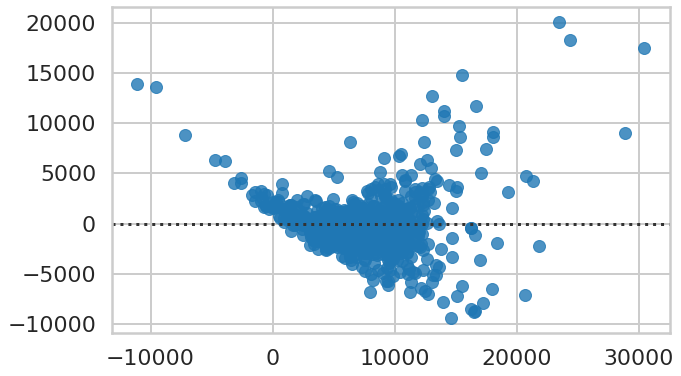

In [81]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_test, y=y_test)

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)

In [84]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [85]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

R-squared score (training): 0.941


In [87]:
print('R-squared score (testing): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (testing): 0.832


In [88]:
#Η τιμή μιας μεταχειρισμένης Porsche Cayman, Κουπέ-Σπορ, του 2007 με 105.000 χιλιόμετρα, βενζίνης, 2.700 κυβικών και 260 ίππων Βλέπουμε ότι όντως η πρόβλεψή μας είναι πολύ κοντά στην πραγματική τιμή του αυτοκινήτου. 
#Προβλέπουμε 26.739€ και η πραγματική τιμή είναι 26.800€
regr.predict([[13, 7, 7, 2007, 105000, 1, 2700, 260]])

array([26739.])

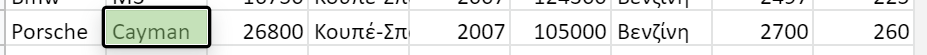

In [89]:
#Η τιμή ενός μεταχειρισμένου Ford Fiesta, Κόμπακτ-Hatchback, του 2015, με 52.000 χιλιόμετρα, βενζίνης, 1.000 κυβικών και 100 ίππων
#Και πάλι βλέπουμε ότι είμαστε αρκετά κοντά στην πραγματική εκδοχή. Εδώ άλλωστε δεν έπρεπε να είμαστε ακριβώς και στην ίδια τιμή, δεδομένου ότι βρίσκουμε την τιμή που θα έπρεπε να κοστίζει το αυτοκίνητο, κάτι που προέρχεται από τα δεδομένα όλων των 
#των μοντέλων του αλγορίθμου. Εξάλλου στον αλγόριθμο υπάρχουν 252 διαφορετικά Ford Fiesta
regr.predict([[4, 32, 9, 2015, 52000, 1, 1000, 100]])

array([9302.43908386])

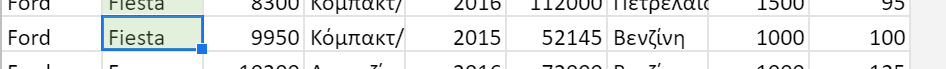

In [90]:
#Η τιμή ενός μεταχειρισμένου Seat Leon Hatchback, του 2013, με 100.000 χιλιόμετρα, βενζίνης, 1.000 κυβικών και 115 ίππων. Εδώ δεν βάζουμε τα στοιχεία ακριβώς ενός αυτοκινήτου στη λίστα μας, αλλά θα ρίξουμε μια ματιά σε αντίστοιχη αναζήτηση στο Car.gr
#Βλέπουμε ότι είμαστε σχετικά κοντά, αν και περίπου 1.000 ευρώ πάνω από την τιμή που βρίσκουμε αντίστοιχης χρονολογίας και παραπλήσιων χιλιομέτρων Seat Leon. 
#Γενικώς ο αλγόριθμος είναι κοντά, αλλά υπάρχουν και περιθώρια βελτίωσης, που έχουν ενδεχομένως να κάνουν με προσθήκη στοιχείων όπως μπορεί να είναι το χρώμα του αυτοκινήτου ή το σαζμάν για παράδειγμα
#Πάντως, εφόσον ο αλγόριθμος κάνει τις προβλέψεις του σύμφωνα με στοιχεία και από άλλα αυτοκίνητα, ίσως αυτό να υποδηλώνει ότι το Seat Leon είναι ένα αυτοκίνητο «ευκαιρία» στην αγορά των μεταχειρισμένων
regr.predict([[15, 48, 9, 2016, 80000, 1, 1000, 115]])

array([11965.04981409])

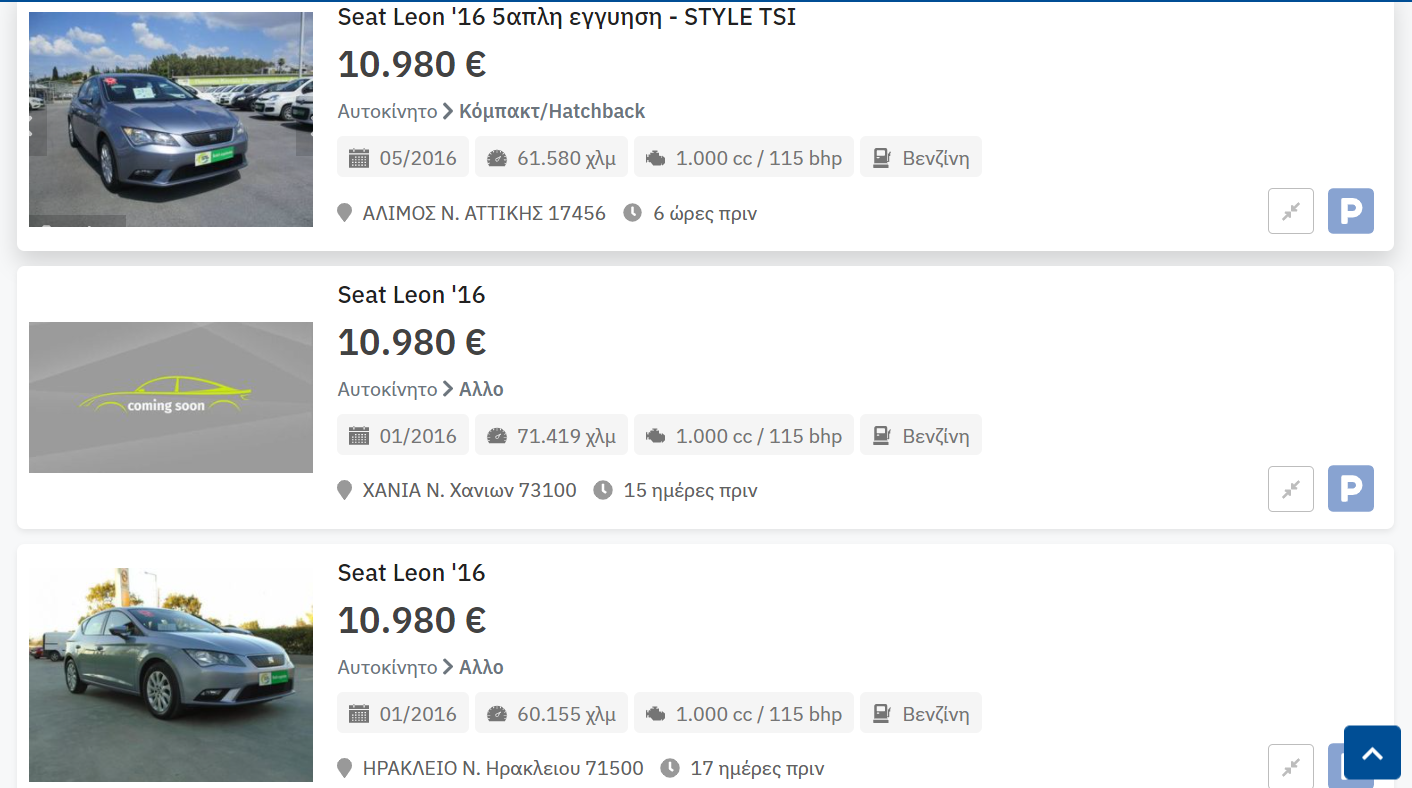